# Dataset from kaggle

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
data = pd.read_csv('Reviews.csv')
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


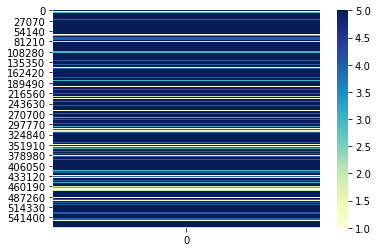

In [35]:
data_hmap = np.asarray(data['Score']).reshape(568454, 1)
sns.heatmap(data_hmap,cmap="YlGnBu")

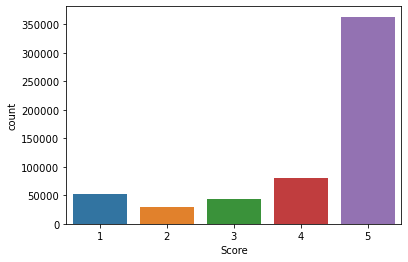

In [36]:
sns.countplot(data['Score'])

# *Features and data selection as per requirement.*

In [37]:
data1 = data.iloc[460190:,[6,8,9]]
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108264 entries, 460190 to 568453
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Score    108264 non-null  int64 
 1   Summary  108260 non-null  object
 2   Text     108264 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.5+ MB


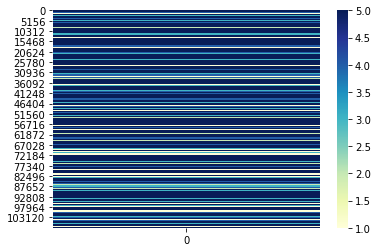

In [38]:
data1_hmap = np.asarray(data1['Score']).reshape(108264, 1)
sns.heatmap(data1_hmap,cmap="YlGnBu")

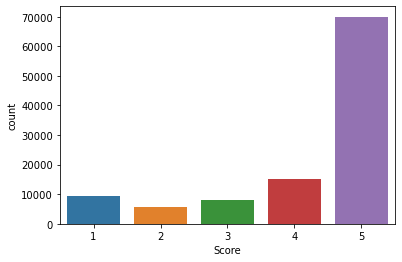

In [39]:
sns.countplot(data1['Score'])

# Model Selection

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data1['Summary'].values.astype('U'), data1['Score'], test_size=0.20)
X_train1, X_test1, y_train1, y_test1 = train_test_split(data1['Text'], data1['Score'], test_size=0.20)

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB,BernoulliNB,GaussianNB

In [41]:
clf_mb = Pipeline([('vectorizer', CountVectorizer()),('mb', MultinomialNB())])
clf_bb = Pipeline([('vectorizer', CountVectorizer()),('bb', BernoulliNB())])

In [42]:
clf_mb.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('mb', MultinomialNB())])

In [43]:
clf_mb.score(X_test,y_test)

0.706876645268554

In [44]:
clf_bb.fit(X_train,y_train)

clf_bb.score(X_test,y_test)

0.6952847180529257

In [45]:
clf_mb.fit(X_train1,y_train1)

clf_mb.score(X_test1,y_test1)

0.702350713526994

In [46]:
clf_bb.fit(X_train1,y_train1)

clf_bb.score(X_test1,y_test1)

0.642774673255438

In [47]:
from sklearn.model_selection import cross_val_score

In [48]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data1['Text'])
X2 = vectorizer.fit_transform(data1['Summary'].values.astype('U'))

In [52]:
cross_val_score(MultinomialNB(),X2,data1['Score'],cv=3)

array([0.6964642 , 0.7003436 , 0.69707382])

In [53]:
cross_val_score(BernoulliNB(),X2,data1['Score'],cv=3)

array([0.68042008, 0.68995234, 0.6862669 ])

In [54]:
cross_val_score(MultinomialNB(),X,data1['Score'],cv=3)

array([0.69211372, 0.69906894, 0.69654733])

In [55]:
cross_val_score(BernoulliNB(),X,data1['Score'],cv=3)

array([0.62984926, 0.63777433, 0.63802372])

As per above observation Multinomial Naive bayes is best fitted ML model for this data.